
### Clustering Analysis on a Customers Dataset

#### Step 1: Data Loading and Initial Exploration


- Load the Mall Customers dataset from the following URL: 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/Cust_Segmentation.csv'.
- Use pandas to read the data and display the first few rows. 
- Generate basic statistics of the data using `.describe()`.


In [ ]:
import pandas as pd
import io
import requests

# Load the data
url = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/Cust_Segmentation.csv'

s = requests.get(url).content
mall_customers = pd.read_csv(io.StringIO(s.decode('utf-8')))
# Write your code here
mall_customers.head()
mall_customers.describe()


,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
count,850.00000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,700.000000,850.000000
mean,425.50000,35.029412,1.710588,8.565882,46.675294,1.576820,3.078773,0.261429,10.171647
std,245.51816,8.041432,0.927784,6.777884,38.543054,2.125843,3.398799,0.439727,6.719441
min,1.00000,20.000000,1.000000,0.000000,13.000000,0.012000,0.046000,0.000000,0.100000
25%,213.25000,29.000000,1.000000,3.000000,24.000000,0.382500,1.045750,0.000000,5.100000
50%,425.50000,34.000000,1.000000,7.000000,35.000000,0.885000,2.003000,0.000000,8.700000
75%,637.75000,41.000000,2.000000,13.000000,55.750000,1.898500,3.903250,1.000000,13.800000
max,850.00000,56.000000,5.000000,33.000000,446.000000,20.561000,35.197000,1.000000,41.300000


#### Step 2: Data Preprocessing

- As observed, the "Address" field in this dataset is a categorical variable. The k-means algorithm, which relies on Euclidean distance, isn't suitable for categorical data because this type of distance measure doesn't make sense for discrete variables. Therefore, exclude this feature and proceed with the clustering analysis.
- Now  normalize the dataset. But why do we need normalization in the first place? Normalization is a statistical method that helps mathematical-based algorithms to interpret features with different magnitudes and distributions equally. We use __StandardScaler()__ to normalize our dataset.



In [ ]:
from sklearn.preprocessing import StandardScaler

x = mall_customers.drop(columns=['Customer Id', 'Address','Defaulted'])

# Step 2: Initialize StandardScaler
scaler = StandardScaler()

# Step 3: Apply the scaler to the numerical features
normalized_data = scaler.fit_transform(x)

# Step 4: Convert normalized data back into a DataFrame
normalized_df = pd.DataFrame(normalized_data, columns=x.columns)

normalized_df

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,DebtIncomeRatio
0,0.742915,0.312122,-0.378790,-0.718459,-0.683811,-0.590489,-0.576525
1,1.489490,-0.766349,2.573721,1.384325,1.414474,1.512962,0.391387
2,-0.252518,0.312122,0.211712,0.268032,2.134141,0.801704,1.597554
3,-0.750235,0.312122,-0.674041,-0.718459,-0.421643,-0.754467,-0.576525
4,1.489490,-0.766349,3.311849,5.356249,3.638900,1.716094,-0.442507
...,...,...,...,...,...,...,...
845,-0.999093,-0.766349,-0.526415,-0.536737,-0.484243,-0.547213,-0.502070
846,-0.874664,0.312122,-0.231164,-0.329054,-0.573202,-0.311403,-0.472288
847,-1.247951,2.469066,-1.264543,-0.744419,0.576666,0.038633,3.458923
848,-0.376947,-0.766349,0.506963,-0.484816,-0.687577,-0.701476,-1.082817


#### Step 3: Applying K-Means Clustering




In [3]:
from sklearn.cluster import KMeans

# Write your code here
kmeans = KMeans(init = "k-means++", n_clusters = 3, n_init = 42, random_state=42)
kmeans.fit(normalized_df)
cluster_labels = kmeans.predict(normalized_df)
mall_customers['Cluster'] = cluster_labels
#centroid value
centroids_value = kmeans.cluster_centers_
centroids_value_df = pd.DataFrame(centroids_value, columns=normalized_df.columns)

print("Cluster Labels Dataset:")
print(mall_customers.head())

print("\nCentroid Values:")
print(centroids_value_df)


Cluster Labels Dataset:
   Customer Id  Age  Edu  Years Employed  Income  Card Debt  Other Debt  \
0            1   41    2               6      19      0.124       1.073   
1            2   47    1              26     100      4.582       8.218   
2            3   33    2              10      57      6.111       5.802   
3            4   29    2               4      19      0.681       0.516   
4            5   47    1              31     253      9.308       8.908   

   Defaulted Address  DebtIncomeRatio  Cluster  
0        0.0  NBA001              6.3        1  
1        0.0  NBA021             12.8        2  
2        1.0  NBA013             20.9        2  
3        0.0  NBA009              6.3        1  
4        0.0  NBA008              7.2        2  

Centroid Values:
       Age       Edu  Years Employed    Income  Card Debt  Other Debt  \
0  0.83689 -0.117758        0.745436  0.347910  -0.032980    0.056219   
1 -0.60494 -0.018697       -0.598266 -0.474145  -0.325308   -0.3783


- Plot the results using a scatter plot. Use `Age` as the x-axis and `Income` as the y-axis. Color the points based on the cluster labels.
- Interpret the plot. What does each cluster seem to represent in terms of customer behavior?


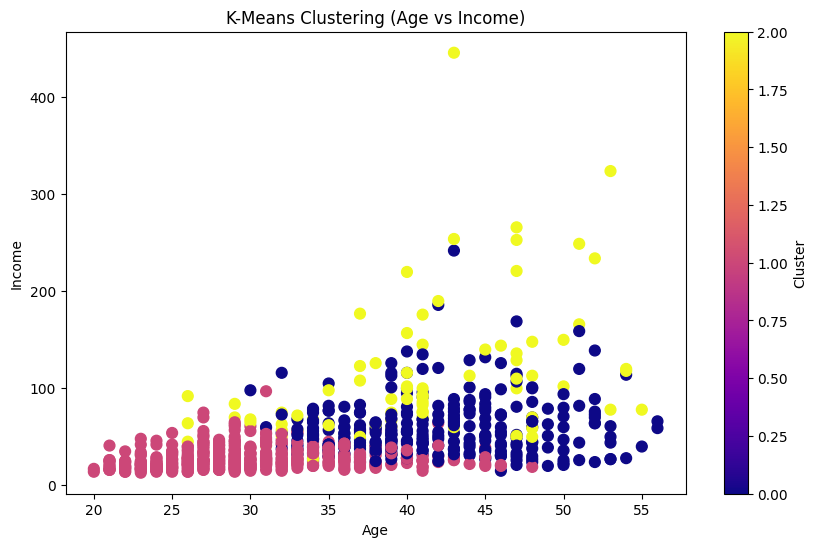

In [4]:
import matplotlib.pyplot as plt

# Write your code here

cluster_data = mall_customers.copy()
cluster_data['Cluster'] = cluster_labels

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(cluster_data['Age'], cluster_data['Income'], c=cluster_data['Cluster'], cmap='plasma', s=60)
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('K-Means Clustering (Age vs Income)')
plt.colorbar(label='Cluster')
plt.show()


#### Step 4: Applying DBSCAN Clustering

- Apply DBSCAN to the same dataset. Start with `eps=0.5` and `min_samples=5`.
- Fit the model and then predict the cluster labels.
- Determine the count of predicted classes. Adjust 'eps' and 'min_samples' to attain a total of three classes.
- Add these labels as a new column in your DataFrame and create a new DataFrame.

In [5]:
from sklearn.cluster import DBSCAN

# Write your code here
mall_customers.isnull().sum()
mall_customers_cleaned = mall_customers.dropna()

#fit model and predict
dbscan = DBSCAN(eps=0.5, min_samples=5).fit(normalized_df)
dbscan_labels=dbscan.fit_predict(normalized_df)

unique_clusters = set(dbscan_labels)
print(f"Number of unique clusters (including noise as -1): {len(unique_clusters)}")

mall_customers['DBSCAN_Cluster'] = dbscan_labels
dbscan_clustered_data = mall_customers.copy()
print(dbscan_clustered_data.head())

#Determine the count of predicted classes. for total three classes
dbscan = DBSCAN(eps=0.6, min_samples=8)
dbscan_labels = dbscan.fit_predict(normalized_data)
mall_customers['DBSCAN_Cluster'] = dbscan_labels
print(f"Adjusted Clusters: {set(dbscan_labels)}")




Number of unique clusters (including noise as -1): 7
   Customer Id  Age  Edu  Years Employed  Income  Card Debt  Other Debt  \
0            1   41    2               6      19      0.124       1.073   
1            2   47    1              26     100      4.582       8.218   
2            3   33    2              10      57      6.111       5.802   
3            4   29    2               4      19      0.681       0.516   
4            5   47    1              31     253      9.308       8.908   

   Defaulted Address  DebtIncomeRatio  Cluster  DBSCAN_Cluster  
0        0.0  NBA001              6.3        1              -1  
1        0.0  NBA021             12.8        2              -1  
2        1.0  NBA013             20.9        2              -1  
3        0.0  NBA009              6.3        1               0  
4        0.0  NBA008              7.2        2              -1  
Adjusted Clusters: {np.int64(0), np.int64(1), np.int64(2), np.int64(-1)}



## Plot the results :
- Compare the results with K-Means. How does DBSCAN differ in terms of cluster formation?

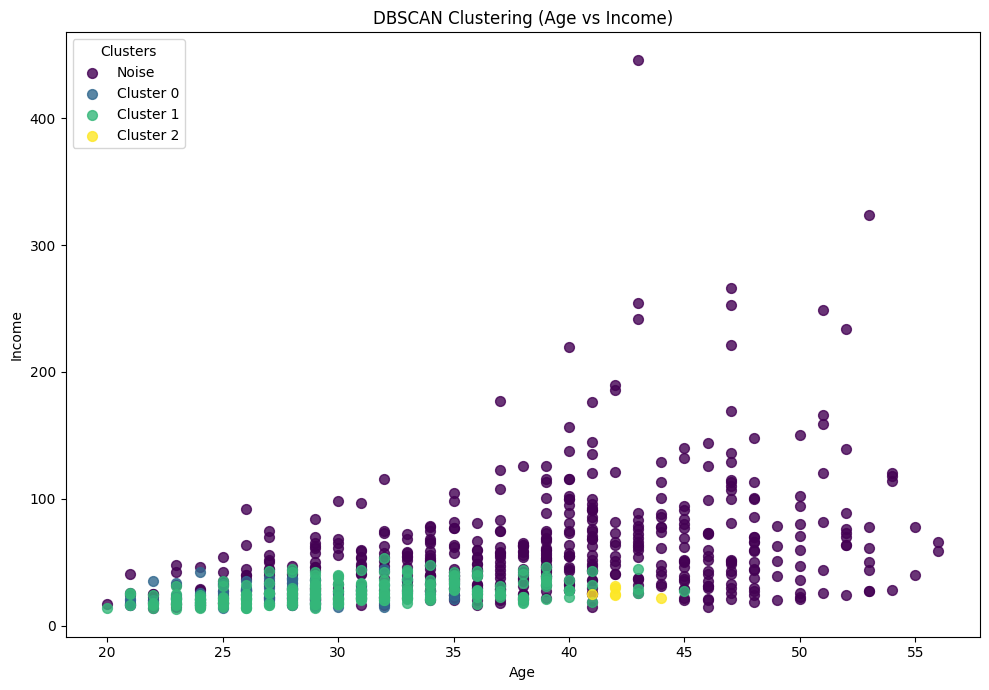

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

# Write your code here
mall_customers['Cluster_Label'] = mall_customers['DBSCAN_Cluster'].apply(lambda x: 'Noise' if x == -1 else f'Cluster {x}')

unique_labels = mall_customers['Cluster_Label'].unique()

# Assign colors dynamically for clusters and noise
colors = plt.cm.viridis(np.linspace(0, 1, len(unique_labels)))

#plot
plt.figure(figsize=(10, 7))

# Plot each cluster and noise
for label, color in zip(unique_labels, colors):
    subset = mall_customers[mall_customers['Cluster_Label'] == label]
    plt.scatter(
        subset['Age'], 
        subset['Income'], 
        label=label, 
        c=[color], 
        s=50, 
        alpha=0.8
    )


plt.xlabel('Age')
plt.ylabel('Income')
plt.title('DBSCAN Clustering (Age vs Income)')
plt.legend(title='Clusters', loc='upper left')
plt.tight_layout()
plt.show()

#### Step 5: Evaluation and Interpretation

- Calculate and compare the silhouette scores for both K-Means and DBSCAN.
- Discuss the strengths and weaknesses of each clustering method based on the dataset and the results obtained.

In [7]:
from sklearn.metrics import silhouette_score

# Write your code here

#Kmeans silhoutte
kmeans_silhouette = silhouette_score(normalized_df, cluster_labels)
print(f"K-Means Silhouette Score: {kmeans_silhouette:.4f}")

#DBSCAN Silhoutte
filtered_data = normalized_df[dbscan_labels != -1]
filtered_labels = dbscan_labels[dbscan_labels != -1]
if len(set(filtered_labels)) > 1:  # Silhouette score requires at least two clusters
    dbscan_silhouette = silhouette_score(filtered_data, filtered_labels)
    print(f"DBSCAN Silhouette Score: {dbscan_silhouette:.4f}")
else:
    dbscan_silhouette = None
    print("DBSCAN did not find enough clusters for a valid silhouette score.")


K-Means Silhouette Score: 0.2336
DBSCAN Silhouette Score: 0.1347


Discussion of K-mean and DBSAN:

Kmean

streanth: Predictability is easy for specified number of clusters from large dataset.
weakness: getting diffilcult with noise and outliers

DBscan:

streanth: Noise and Outliers can detect
weakness: computational problem in large dataset, getting high noise levels.